In [21]:
import json

import numpy as np
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

from mplsoccer import Pitch, FontManager, Sbopen

In [22]:
with open("./data/WhoScored/match_1734731.json") as f:
    data_dict = json.load(f)
data_dict.keys()

dict_keys(['matchId', 'matchCentreData', 'matchCentreEventTypeJson', 'formationIdNameMappings'])

In [23]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [24]:
events_dict, players_df, teams_dict = extract_data_from_dict(data_dict)
home_team_id = 2783
away_team_id = 65

In [25]:
def get_passes_df(events_dict, team_id):
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)


    # filter only passes and team
    passes_ids = df.index[(df['eventType'] == 'Pass') & (df['teamId'] == team_id)]
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "eventType", "outcomeType"]]

    return df_passes

In [26]:
home_team_df_pass = get_passes_df(events_dict, home_team_id)
away_team_df_pass = get_passes_df(events_dict, away_team_id)
# home_team_df_pass

In [27]:
# away_team_df_pass

In [28]:
pitch = Pitch(pitch_type='statsbomb',  line_zorder=2, line_color='#c7d5cc', pitch_color='#22312b')
bins = (6, 4)


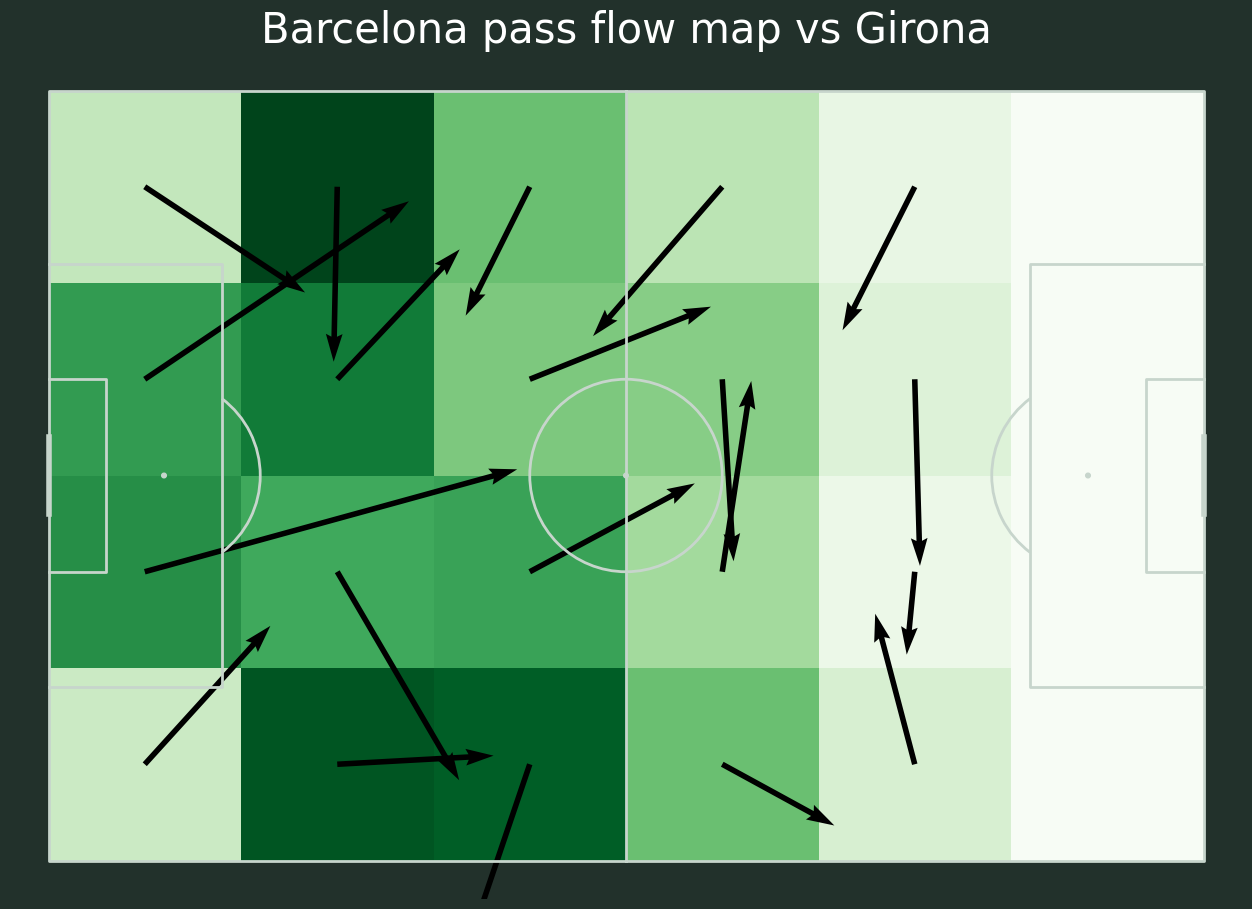

In [29]:
# Barcelona
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(home_team_df_pass.x, home_team_df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
# plot the pass flow map with a single color and the
# arrow length equal to the average distance in the cell
fm = pitch.flow(home_team_df_pass.x, home_team_df_pass.y, home_team_df_pass.endX, home_team_df_pass.endY, color='black',
                arrow_type='average', bins=bins, ax=ax)
ax_title = ax.set_title(f'Barcelona pass flow map vs Girona', fontsize=30, pad=-20, color = 'white')

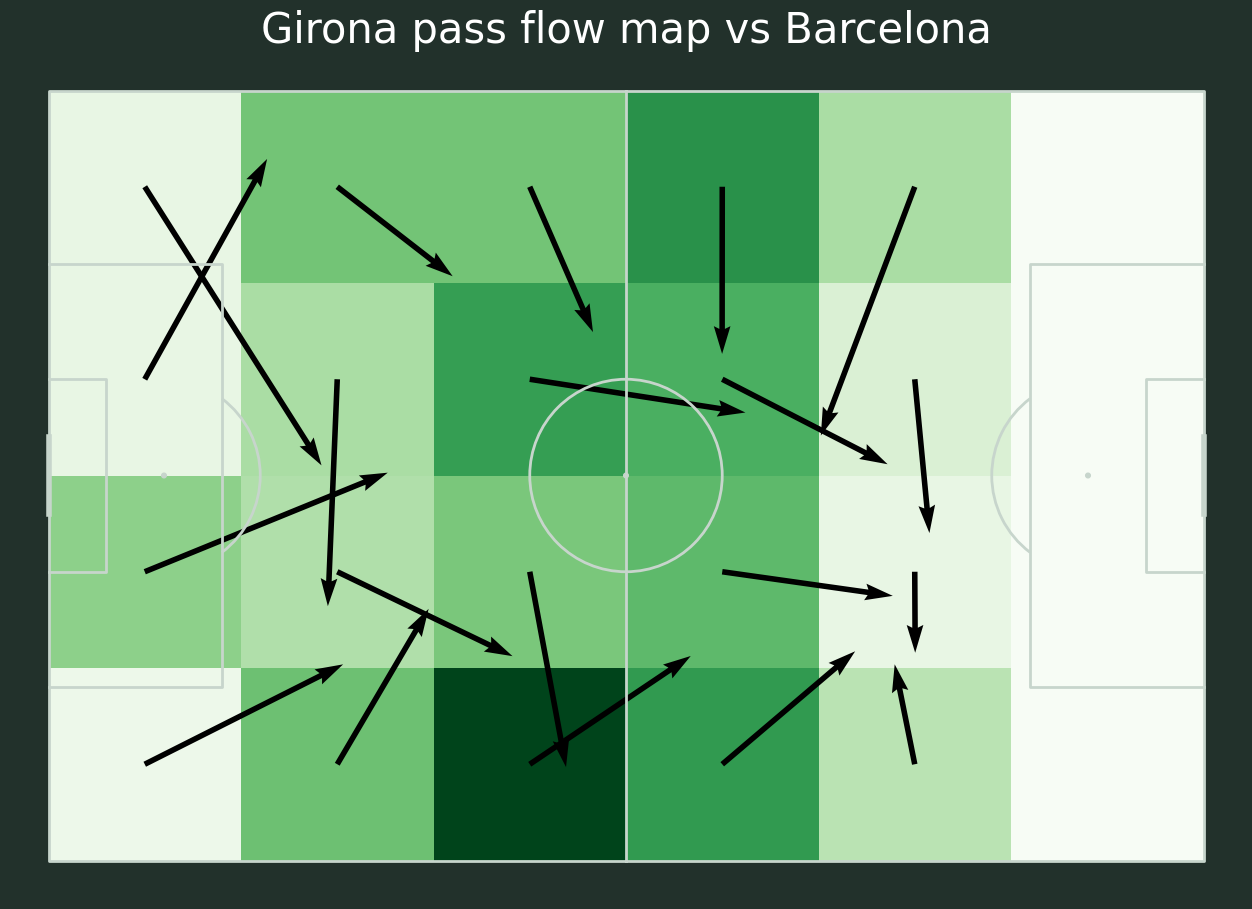

In [30]:
#Girona
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(away_team_df_pass.x, away_team_df_pass.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Greens')
# plot the pass flow map with a single color and the
# arrow length equal to the average distance in the cell
fm = pitch.flow(away_team_df_pass.x, away_team_df_pass.y, away_team_df_pass.endX, away_team_df_pass.endY, color='black',
                arrow_type='average', bins=bins, ax=ax)
ax_title = ax.set_title(f'Girona pass flow map vs Barcelona', fontsize=30, pad=-20, color = 'white')